## This notebook is meant to capture experience with Jeffery's Priors
https://en.wikipedia.org/wiki/Jeffreys_prior



In [7]:
import pymc3 as pm
import theano
import numpy as np
import scipy.stats as ss
import seaborn as sns

sns.set(font_scale=1.5)

# Guassian mean

$f(x\mid\mu) = \frac{e^{-(x - \mu)^2 / 2\sigma^2}}{\sqrt{2 \pi \sigma^2}}$

with $\sigma$ fixed, the Jeffreys prior for the mean $\mu$ is
: $\begin{align} p(\mu) & \propto \sqrt{I(\mu)}
= \sqrt{\operatorname{E}\!\left[ \left( \frac{d}{d\mu} \log f(x\mid\mu) \right)^2\right]}
= \sqrt{\operatorname{E}\!\left[ \left( \frac{x - \mu}{\sigma^2} \right)^2 \right]} \\\\
& = \sqrt{\int_{-\infty}^{+\infty} f(x\mid\mu) \left(\frac{x-\mu}{\sigma^2}\right)^2 dx}
=  \sqrt{1/\sigma^2} \propto 1.\end{align}

# Gaussian sd

$f(x\mid\sigma) = \frac{e^{-(x - \mu)^2 / 2 \sigma^2}}{\sqrt{2 \pi \sigma^2}}$,

with $\mu$ fixed, the Jeffreys prior for the standard deviation $\sigma > 0$ is
: $\begin{align}p(\sigma) & \propto \sqrt{I(\sigma)}
= \sqrt{\operatorname{E}\!\left[ \left( \frac{d}{d\sigma} \log f(x\mid\sigma) \right)^2\right]}
= \sqrt{\operatorname{E}\!\left[ \left( \frac{(x - \mu)^2-\sigma^2}{\sigma^3} \right)^2 \right]} \\\\
& = \sqrt{\int_{-\infty}^{+\infty} f(x\mid\sigma)\left(\frac{(x-\mu)^2-\sigma^2}{\sigma^3}\right)^2 dx}
= \sqrt{\frac{2}{\sigma^2}}
\propto \frac{1}{\sigma}.
\end{align} 

### Example model

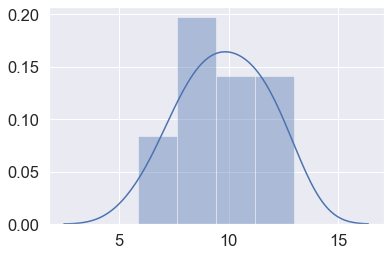

In [9]:
data = np.random.normal(10, 2, size=20)
sns.distplot(data)

In [ ]:
def jeffreys(value):
    return -theano.tensor.log(value)

with pm.Model() as model:
    sigma = pm.DensityDist('sigma', jeffreys, testval=1)
    mu = pm.DensityDist('mu', jeffreys, testval=1)
    


# Poisson

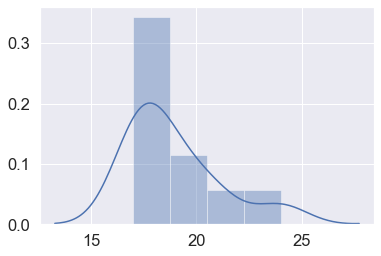

In [26]:
data = np.random.poisson(20, size=10)
sns.distplot(data)

In [27]:
def jeffreys(value):
    return -theano.tensor.log(value)

with pm.Model() as model:
    mean = pm.DensityDist('mean', jeffreys, testval=1)
    poi = pm.Poisson('Poisson', mean, observed=data)
    
    mean_flat = pm.Uniform('mean_flat', 0, 100)
    poi_flat = pm.Poisson('Poisson_flat', mean_flat, observed=data)

    trace = pm.sample(10000, tune=1000)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mean_flat, mean]
Sampling 4 chains, 0 divergences: 100%|██████████| 44000/44000 [00:08<00:00, 5069.74draws/s]


In [28]:
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mean,18.900,1.377,16.334,21.474,0.007,0.005,35207.0,34612.0,35565.0,27445.0,1.0
mean_flat,19.015,1.389,16.434,21.613,0.007,0.005,34386.0,34217.0,34498.0,28372.0,1.0


/Users/balarsen/miniconda3/envs/python3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/balarsen/miniconda3/envs/python3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/balarsen/miniconda3/envs/python3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/balarsen/miniconda3/envs/python3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument b

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc221c79c50>,
      dtype=object)

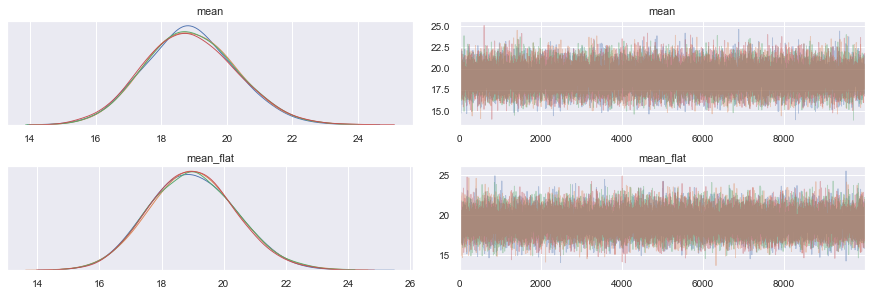

In [29]:
pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc221e3a9d0>,
      dtype=object)

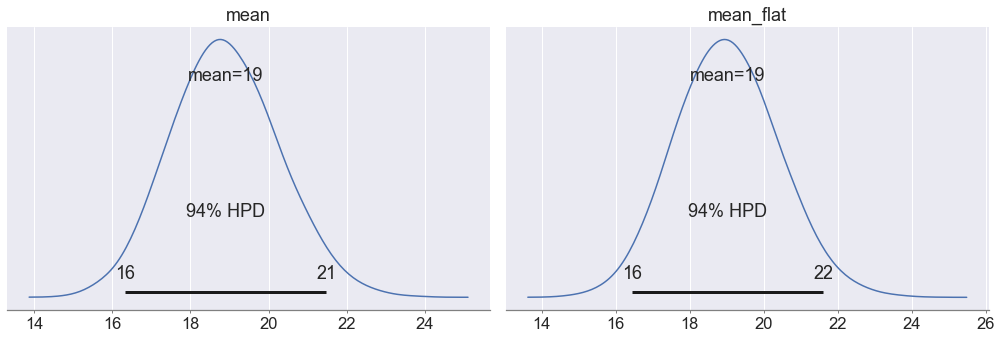

In [30]:
pm.plot_posterior(trace)

In [6]:
# Make custom Jeffreys prior, returns log prior
def jeffreys(value):
    return -theano.tensor.log(value)

# Instantiate model
model = pm.Model()
with model:
    # Priors for unknown model parameters
    sigma = pm.DensityDist('sigma', jeffreys, testval=1)
    slope = pm.Uniform('slope', lower=-1, upper=1, testval=0.5)
    intercept = pm.Uniform('intercept', lower=-10, upper=10, testval=0)

    # Expected value of outcome
    mu = slope * df.parent_bd + intercept

    # Likelihood (sampling distribution) of observations
    y_obs = pm.Normal('y_obs', mu=mu, sd=sigma, observed=df.offspring_bd)

    # draw 10000 posterior samples for burn-in
    trace = pm.sample(10000)



NameError: name 'df' is not defined

In [ ]:
pm.summary(trace, ['slope', 'intercept', 'sigma'])

In [ ]:
pm.traceplot(trace, ['slope', 'intercept', 'sigma']);